# 一次変換と matplotlib

線形写像について、また、複素平面について、
プログラムを通じて勉強しよう。


行列 $A$ が与えられた時に、$A \vec{x} = \lambda \vec{x}$ となる $\lambda$ と $\vec{x}$ がある時，
$\vec{x}$ を固有ベクトル，$\lambda$ を対応する固有値といいます。すなわち，$A$ による一次変換で向きを変えない
ベクトルと，それにより何倍になるかという数です。

$\lambda$ が固有値の時，$(A - \lambda I) \vec{x} = 0$ です。よって，
$det(A - \lambda I) = 0$ です。これは，$\lambda$ の $n$ 次方程式（固有方程式という）なので，
$n$ 次行列の固有値は，重複を含めて高々 $n$ 個存在します。また，固有値 $\lambda$ の固有ベクトルのなす空間
のことを，$\lambda$ の固有空間といいます。固有空間の次元は，$n - rank(A - \lambda I)$ であす。特に，1 次元
以上です。

numpy には、linalg.eig という，固有値と固有ベクトルを返してくれる関数があります。この関数は、(固有値のベクトル, 固有ベクトルを並べてできた行列(各列が固有ベクトル))というタプルを返します。ですので、2 つの変数のペアで返値を受け取れば，それぞれをとってこれます。

In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
a = np.array([[1,0],[-0.5,2]])
e, v = np.linalg.eig(a)
print(e)
print(v)

[2. 1.]
[[0.    0.894]
 [1.    0.447]]


v は，固有ベクトルのリストではなく，v の各列が固有ベクトルだということに注意してください。この場合，固有値は 2 と 1 で，2 の固有ベクトルは [0,1] 1 の固有ベクトルは [0.894, 0.447] です。 

**練習問題**
2 次元の場合で、固有値、固有ベクトルを計算するプログラムを自分でも書いてみよう。高次元になると、方程式が高次になるので、ニュートン法などで方程式を解くなどのことを考える必要がある。

固有値は，行列の対角化と深く関係してますし，様々なところででてくる重要な概念です。
固有値，固有ベクトルの意味を考えるために，画像に対する，これらの変換による一次変換を考えてみましょう。



Python では、画像処理に、Pillow (PIL) パッケージが広く使われています。
画像を表示するだけなら、PIL パッケージに属する Image モジュールを用いて、次のようにして簡単にできます。
Image.open により、画像ファイルに対応した Image オブジェクトが作られます。このオブジェクトは、
show メソッドでウィンドウを開いて表示できます。

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=500x500 at 0x7FF8789AEA30> <class 'PIL.PngImagePlugin.PngImageFile'>


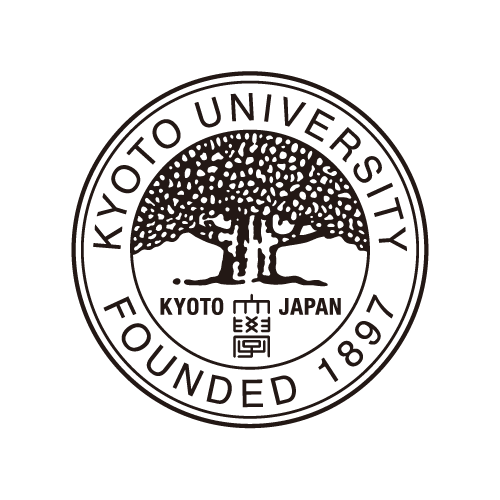

In [2]:
import PIL.Image as Image

im = Image.open("./logo.png")
print(im, type(im))
im

PIL モジュールには、ImageDraw モジュールもあり、Image に対する描画ができます。ImageDraw.Draw 関数で返されるのは、
この画像に対する描画を担当する ImageDraw クラスのオブジェクトで、それに対して line などのメソッドを呼び出すことに
より、描画ができます。line は、第1引数でリストとして座標が与えられた2点を結ぶ線をひくものです。

後の描画をわかりやすくするために，格子線をひいておきます。

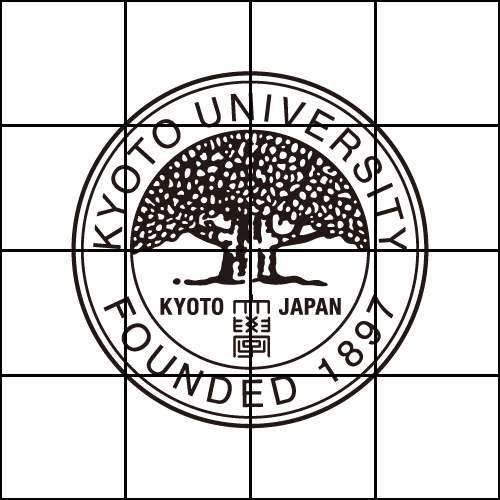

In [3]:
from PIL import Image,ImageDraw

im = Image.open("./logo.png")
draw = ImageDraw.Draw(im)
w, h = im.size  # 500x 500のはず
for i in (list(range(0, 500, 125)) + [499]):  
                # range には + はできないので、list に一旦変換
    draw.line([i,0,i,500],fill="black",width=3)
    draw.line([0,i,500,i],fill="black",width=3)
im

さらに、im を、np.asarray でピクセルの配列に変換し，
matplotlib で表示しましょう。


(500, 500, 4)


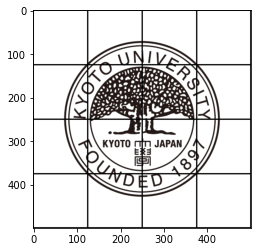

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

imarray = np.asarray(im)

#imarray は，画像のサイズ x 4 の rgba の配列
print(imarray.shape)

plt.imshow(imarray, aspect="equal")
plt.show()

これからの処理のために、x, y の座標が[0,500]x[0,500] ではなく，[-1,1]x[-1,1] 上の画像となるようにしましょう。
もともと白黒画像なので，黒となっている[-1,1]x[-1,1]　の点のリストとして表現しなおしてやります。

imarray の shape を見ればわかるように、imarray は(500,500,4) の3次元配列です。
imarray(x,y,a) は，各点の色の a 成分 (a = 0,1,2,3 は，r(赤), g(緑), b(青), alpha（透明度）) を表しています。
a = 3, すなわち，alpha成分だけとってきた2次元配列を fst としましょう。(他の成分では draw.line で描いた線がうまく出ないようです。)
そして，fst[x,y] が 0 でない点の座標 (x, y) だけを取り出して，それを
[-1,1]x[-1,1] の範囲に座標変換した値 (x, y) のリスト original を作ります。
numpy で操作するには，タプルのリストではなく，x, y 成分を0行目，1行目にもつ２次元配列にする必要があります。
x 成分，y 成分だけの配列 imagex, imagey を作り，それらからなる ndarray である image を作ります。

In [5]:

# 第3成分だけをとってくる。
fst= imarray[:,:,3]

#(x, y) の点が 0 でない（つまり，色がついている）所の座標を [-1, 1]x [-1,1] に変換した座標のリストを作る。
original = [((y-250)/250,((250-x)/250)) for x in range(500) for y in range(500) if fst[x,y] != 0]

#その x　成分，y 成分の配列のペアとなる配列を作る
image = np.array([[x[0] for x in original],
                  [x[1] for x in original]])
image

array([[-1.   , -0.996, -0.992, ...,  0.988,  0.992,  0.996],
       [ 1.   ,  1.   ,  1.   , ..., -0.996, -0.996, -0.996]])

次に定義する showimage は、この image の形式の画像を表示するものです。

matplotlib の scatter は，与えられた座標に点をうつものですが，第1引数，第2引数に，x, y 座標の他に，
x 座標の配列, y 座標の配列をとることもできます。しかし，これらをまとめた配列(すなわち img ) をとることはできません。2 引数をとる関数に，リストや tuple を適用するのに，引数に`*` をつければいいということは以前学びましたが，同じことは，ndarray でもできます。よって，scatter の引数に *image をわたしています。
本質はこの行だけで，あとは座標軸の描画関係なので，無視して大丈夫です。

matplotlib は，最後に plt.show() により描画を行いますが，notebook の場合には，セルの最後に行ってくれます。その方が、showimage の後に行う描画と一緒に一つの画面に行えて便利なので，show なしで利用します。




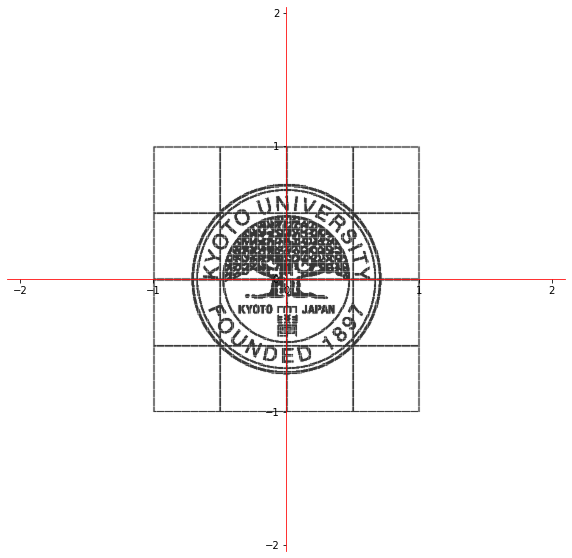

In [6]:
def showimage(image, size=0):
    """ image で与えられた点の集まりを全て plot した図を作る。size は描画する範囲が
    ([-size,size]x[-size,size])になるように指定。"""
    if(size== 0):
        size = int(image.max())+1
    fig, ax = plt.subplots(figsize=(size*5,size*5))
    plt.scatter(*image, s=0.01, c="black")  # 0,01 は点のサイズ。
    
    #表示範囲の設定
    ax.set_aspect('equal', 'datalim') #x 軸と y 軸の目盛りを同じ幅にする。
    ax.set_ylim([-size-0.1,size+0.1])
    ax.set_xlim([-size-0.1, size+0.1])
    # 座標軸の設定(面倒だが、左と下ではなく、座標軸に数を入れるのに、他にいい方法はなさそう)
    for d in ['bottom', 'left']:
        ax.spines[d].set_position(('data', 0))
        ax.spines[d].set_color('red')
    ax.set_xticks(range(-size, size+1, 1))
    ax.set_yticks(range(-size, size+1, 1))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#    plt.show()

  
showimage(image)

image という ndarray には，
元と同じ画像が，[-1,1]x[-1,1] の範囲で作られていることが分かります。さて，image には黒い点の x座標, y 座標の列からなる配列がはいっています。
それに座標変換を行い，絵がどうなるか見てみましょう。
座標変換後の x座標, y 座標の列からなる配列を得るには，変換行列を左からかければいいはずです。

行列 $A = \left(\begin{array}{cc}a& b\\ c& d\end{array}\right)$
による一次変換は，点
$\left(\begin{array}{cc}1\\ 0\end{array}\right)$ を
$\left(\begin{array}{cc}a\\ c\end{array}\right)$ に，点
$\left(\begin{array}{cc}0\\ 1\end{array}\right)$ を
$\left(\begin{array}{cc}b\\ d\end{array}\right)$ に移動させる変換
であることと，線形性を，この図から確認しましょう。

まず，，a は，x 成分を2倍，y 成分はそのままという一次変換行列です。

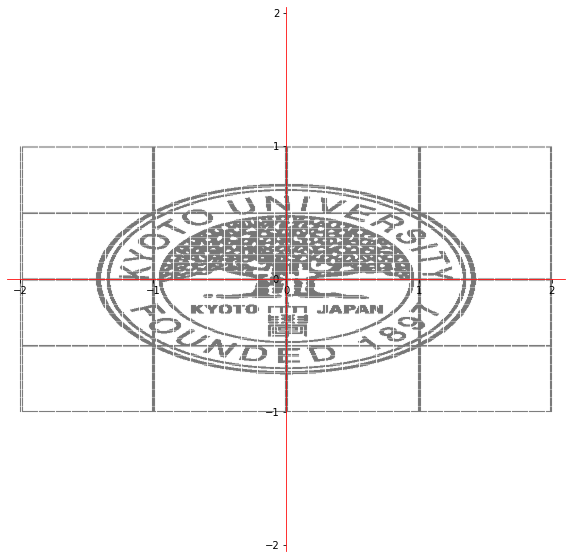

In [7]:
a = np.array([
    [2,0],
    [0,1]])
newfig = a@image
showimage(newfig)


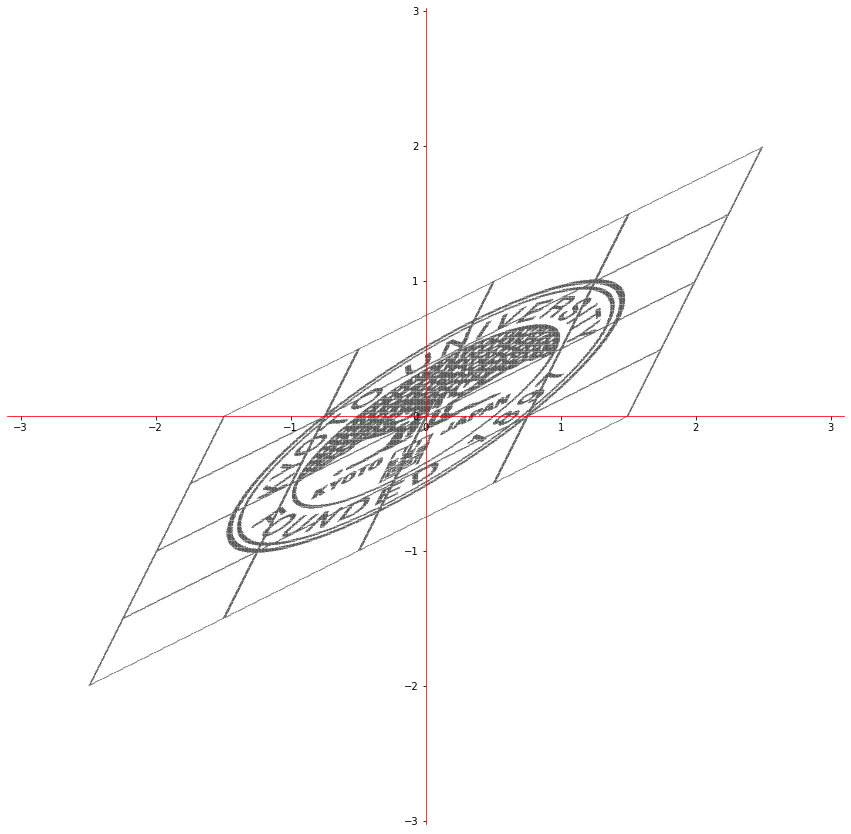

In [8]:
a = np.array([
    [2,0.5],
    [1,1]])
newfig = a@image
showimage(newfig)


**練習問題10** 与えられた t に対して，t だけの回転行列を返すメソッド trans を作ろう。それをかけることにより，image を回転させた絵を作成し，描画しよう。


**練習問題20** 行列 `[[a,b][c,d]]` による一次変換を行うと，(1,0) が (a,c), (0,1) が (b,d) に移ります。
そのことが分かるように，行列 v をもらい，その行列で image を一次変換した画像の上に，(a,c) および (b,d) に，赤および青の点をうった絵を描く，trans(v) を作ろう。
点は，matplotlib　の scatter 関数で打つことができる。また，matplotlib は，show を呼び出さないと、セルにある描画命令をまとめて実行してくれるので，showimage の後に，これを行えばよい。
showimage の第2引数で int の値 size を渡すと，描画範囲を [-size,size]x[-size,size] にできる。v をもとに，適切な値をshowimage にわたして，画像が画面内に収まるようにしよう。


trans を用いて、いろんな行列の一次変換の結果を描画しよう。

**練習問題30** 角度 30 の回転行列

**練習問題35** t = 30 とし、(cos(t), sin(t)) と原点を結ぶ直線に対する折り返し。(-t 度回転し、x 軸で折り返し、t 度すればよい。)
(-2cos(t),-2sin(t)) と (2cos(t), 2sin(t)) を結ぶ線分も描こう。2点 [x0,y0], [x1,y1] を結ぶ青色の線分で幅が3 のものは，

```plt.plot([x0,x1], [y0,y1], 'b-', lw=3) ```

で描くことができる。


**練習問題40**  A = [[1, 0.2],[0.5, 1]], A の 2乗，A の3乗。
行列 a の n 乗は，
```
np.linalg.matrix_power(a, n) 
```
で求まる。

**練習問題50**  A = [[1,0],[-0.5,1]],
A の 2乗，A の 3 乗。　　　

**練習問題60** 
trans を，固有値を表示し，固有値が実数の時には，原点を始点とする固有ベクトルも描画するように変更した，eigen(a) を作成しよう。x が実数かどうかは，type(x) == complex で調べることができる。上の練習問題のそれぞれの行列に対して新しい eigen を行い，固有値と固有ベクトルの意味を確認しよう。


**練習問題70** 
最大の固有値に対応する固有ベクトルが X 軸に来るように、図形を回転させよう。

**練習問題80** (xx, yy) をもらい，xx, yy だけ平行移動を行うにはどうすればよいか考えましょう。
それは，(x, y) の代わりに (x, y, 1) を考えて，　
`[[1,0,xx],[0,1,yy]]` という行列との掛け算をすればよいはずです。画像を表す ndarray figx の長さは，
`figx.shape[0]` でとって来れます。また，[1,1,1...,1] という大きさ n のリストは [1]*n　でできます。

## 複素数

複素数は，平面上の点と１対１に対応します。そして，複素関数
$y = f(x)$ は，平面上の点を点に，図形を図形に移す写像となります。解析的（無限回微分可能）な複素関数が作る変換は，きれいな特徴を持っています。

original は，点を表す (x, y) というペアのリストだったので，次で，対応する複素数の ndarray が作れます。

In [9]:
imagec = np.array([complex(*t) for t in original])

後で割り算をする都合で，0 だけ，消しておきましょう。

In [10]:
print(np.where(imagec == 0))
print(len(imagec))
imagec = np.delete(imagec, np.where(imagec == 0))
print(len(imagec))

(array([32436]),)
52717
52716


それを画面表示するには，次のようにすればいいでしょう。
plt は複素数に対応していないので，実数部分と虚数部分の２つのリストを作ってから scatter に渡しています。

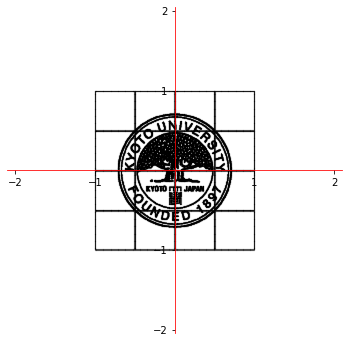

In [11]:
def showcimage(cimage, size=2):
    """ image で与えられた点の集まりを全て plot した図を作る。size は描画する範囲が
    ([-size,size]x[-size,size])になるように指定。"""
    fig, ax = plt.subplots(figsize=(size*3,size*3))
    ax.set_aspect('equal', 'datalim') #x 軸と y 軸の目盛りを同じ幅にする。
    plt.scatter([x.real for x in cimage], [x.imag for x in cimage], s=0.01, c="black")  # 0,01 は点のサイズ。
    
    #表示範囲の設定
    ax.set_ylim([-size-0.1,size+0.1])
    ax.set_xlim([-size-0.1, size+0.1])
    # 座標軸の設定(面倒だが、左と下ではなく、座標軸に数を入れるのに、他にいい方法はなさそう)
    for d in ['bottom', 'left']:
        ax.spines[d].set_position(('data', 0))
        ax.spines[d].set_color('red')
    ax.set_xticks([-2,-1,1, 2])
    ax.set_yticks([-2,-1,1, 2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#    plt.show()

showcimage(imagec, 2)  


複素数の掛け算は回転と拡大・縮小を表します。

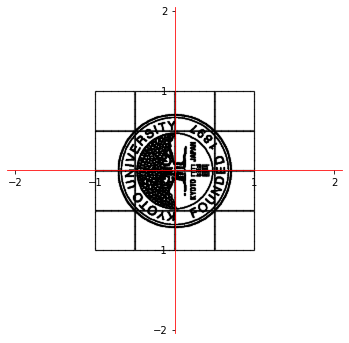

In [12]:
showcimage(imagec*1j)  


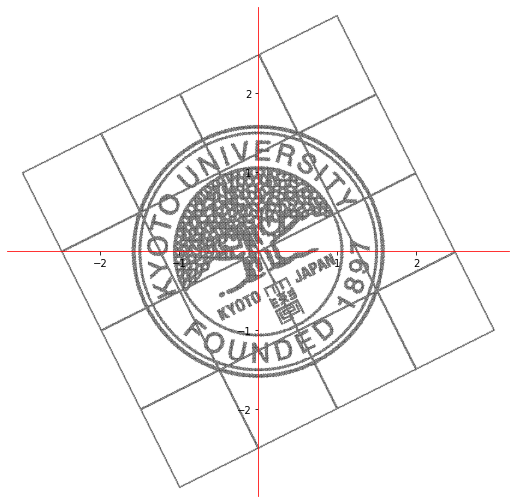

In [13]:
showcimage(imagec*(1j+2),3)  

関数 f(x)=1/x は，単位円に関してひっくり返して，さらに，複素共役をとります。
よって，g(x) = np.conjugate(1/x) により，単位円に関してひっくり返すことになります。
直線でなく，円に対して対象というのは分かりにくいでしょうが，x 軸上で  x と 1/x の関係を考えて，絵を見て直感的に感じてください。

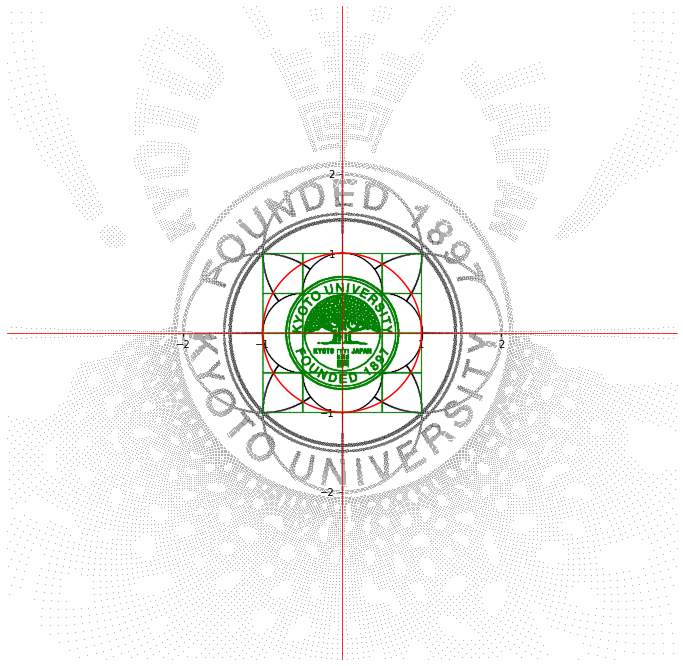

In [14]:

showcimage((1/imagec), 4)  

#imagec を青で描画
import math
plt.scatter([x.real for x in imagec], [x.imag for x in imagec], s=0.01, c="green")  # 0,01 は点のサイズ。

# 単位円を赤で描画
x = []
y = []
for j in np.linspace(0, 2 * np.pi, 1000):
      x.append(math.sin(j))
      y.append(math.cos(j))
plt.plot(x,y, c="red")


元の絵を，複素単位 i だけ下にずらして，x 軸より下だけにして
1/x をとってみましょう。0 で割り算の warning は気にしないでいきましょう。


/var/folders/3m/5wtnt7kx3r783x3yxm8q17s00000gn/T/ipykernel_51121/4264954069.py:1: RuntimeWarning: divide by zero encountered in true_divide
  showcimage((1/(-1j+imagec)), 3)
/var/folders/3m/5wtnt7kx3r783x3yxm8q17s00000gn/T/ipykernel_51121/4264954069.py:1: RuntimeWarning: invalid value encountered in true_divide
  showcimage((1/(-1j+imagec)), 3)


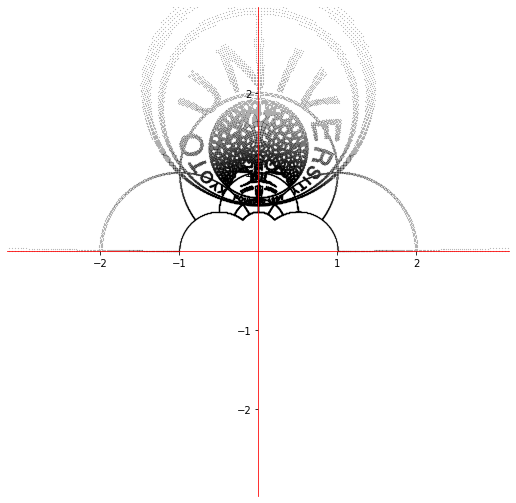

In [15]:
showcimage((1/(-1j+imagec)), 3)  

f(x) = x**2 は，1:2 の写像なので，2重になってしまうので，ちょっと複雑です。

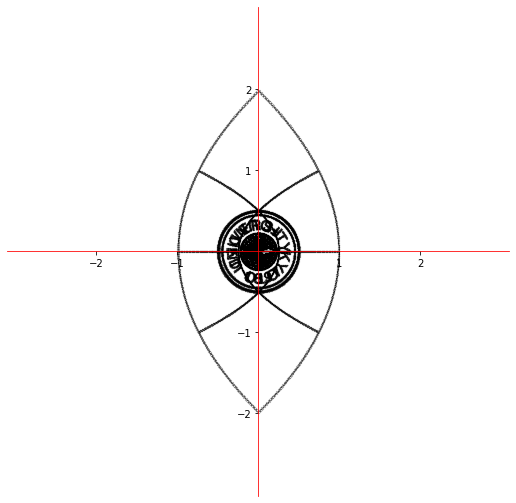

In [16]:
showcimage(imagec ** 2, 3) 

2 重にならないように，1 を足して，元の絵を y 軸の右側だけに
もっていって行いましょう。元の絵を，y 軸が x 軸のマイナス部分にくるように
引き伸ばした絵になっているのがわかりますか？

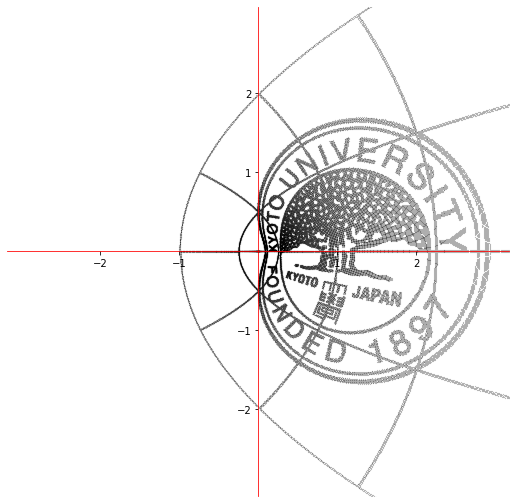

In [17]:
showcimage((1+imagec) ** 2, 3) 

逆の sqrt は，x 軸のマイナス部分で切ってそれが y 軸にくるまで伸ばした感じです。原点周りが薄くなっているように，原点の周りは引き伸ばされています。

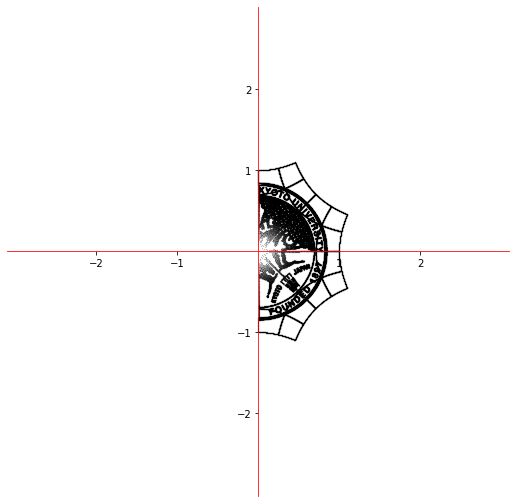

In [18]:
import cmath
showcimage([cmath.sqrt(x) for x in imagec], 3) 

メビウス変換（一次の分数写像）は，複素平面に無限遠点を加えたところ(無限遠をz = 1 の所にしたリーマン球面を考えるとわかりやすいです）で考えると，１対１の写像になっています。次の写像は，
1 が0 に，0 が -1 に，-1 が無限大に，無限大が 1 になっています。つまり，リーマン球面を，y 軸の周りで 90 度回転させています。

/var/folders/3m/5wtnt7kx3r783x3yxm8q17s00000gn/T/ipykernel_51121/1710451020.py:1: RuntimeWarning: divide by zero encountered in true_divide
  showcimage((imagec-1)/(imagec+1),3)
/var/folders/3m/5wtnt7kx3r783x3yxm8q17s00000gn/T/ipykernel_51121/1710451020.py:1: RuntimeWarning: invalid value encountered in true_divide
  showcimage((imagec-1)/(imagec+1),3)


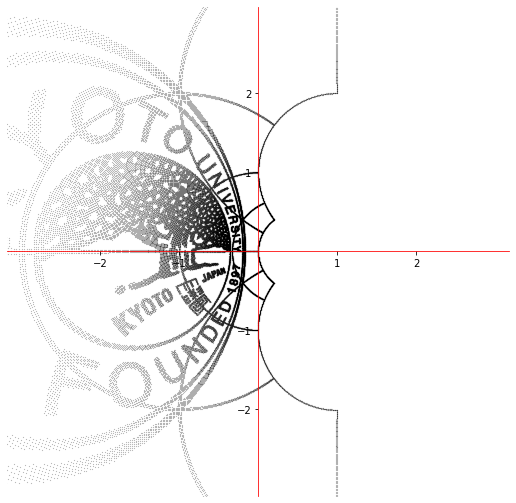

In [19]:
showcimage((imagec-1)/(imagec+1),3) 

$y = e^x$ は次のようになります。

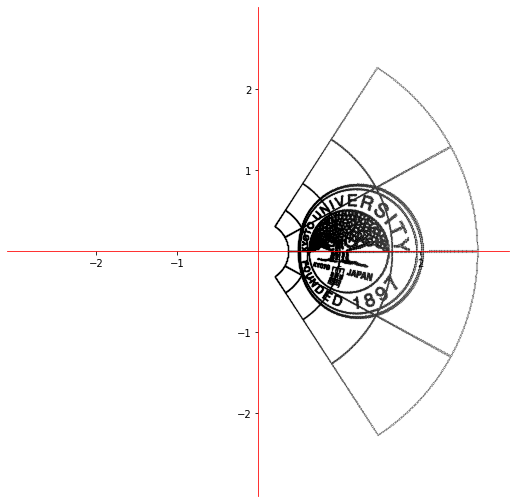

In [20]:
showcimage(np.exp(imagec),3)  

（解析的な）複素関数をかけても，字が自然に読めるのが不思議ではありませんか？これは，変換結果をずっと拡大して，ローカルに見たら，形を変えていないことに由来しています。直交した曲線は，直交した曲線に移ります。

**練習問題** いろんな関数について，図示してみよう。

**練習問題** 今の絵の書き方では，拡大率の大きい所は薄くなってしまいます。拡大率の大きなところも薄くならなくすることも，結果の絵の方からはじめて，それがもともとどの点から来てたか（つまり，逆関数）を考えて描画すればできるはずです。そのように，書き換えてみましょう。

## 行列の対角化

$n$ 次正方行列 $A$ が，（重複を含めて）$n$ 個の固有値 $\lambda_1,\ldots, \lambda_n$ をもち，
$k$ 回重複している固有値は，$k$ 次元の固有空間を持つ場合だけを考え，一次独立な $k$ 個の固有ベクトル
をとっておきます。そのようにして， $\lambda_1,\ldots, \lambda_n$ に対応する
固有ベクトルを $p_1,\ldots,p_n$ とし，$P = (p_1,\ldots,p_n)$ という行列を考えます。すると，
$A p_i = \lambda_i p_i$ なので，対角行列
$$C = \begin{pmatrix}
  \lambda_{1}                                                \\
         & \lambda_{2}          &        & \text{\huge{0}}   \\
         &                 & \ddots                     \\
         & \text{\huge{0}} &        & \ddots            \\
         &                 &        &           & \lambda_{n}
\end{pmatrix}
$$
に対し，$A P = P C$ を見対します。
つまり，$A = P C P^{-1}$ となり，$A$ は対角化されます。
このように，固有値は対角化と密接に関係しています。

$A$ による一次変換を $P C P^{-1}$ という合成として見ると，対角化可能な行列による一次変換がよくわかります。
簡単のために，２次元で話をします。
$P = (p_1,\ldots,p_n)$ は，
$\left(\begin{array}{cc}1\\ 0\end{array}\right)$ を $p_1$ に，
$\left(\begin{array}{cc}0\\ 1\end{array}\right)$ を $p_2$ に移動させる変換でした。
ということは，$P^{-1} は，
$p_1$ を $\left(\begin{array}{cc}1\\ 0\end{array}\right)$ に，
$p_2$ を $\left(\begin{array}{cc}0\\ 1\end{array}\right)$ に移動させます。
すなわち，$P$ をかけることにより，$A$ の固有ベクトルが単位ベクトルにうつります。
そのうえで，$C$ をかけると，それぞれの単位ベクトル方向に固有値倍されます。それから，$P$ をかける
ことにより，単位ベクトル方向が固有ベクトル方向に戻されます。


このことを，図示して確認しましょう。
\begin{pmatrix}
2 & 0.5\\
1 & 1
\end{pmatrix}という行列は，次のように固有値をもってました。
まず，固有ベクトルを描きます。

まず，固有ベクトルが座標軸の方向に来るように変換して，座標軸方向に固有値分だけ拡大して，固有ベクトルをもとに戻しているのが分かると思います。

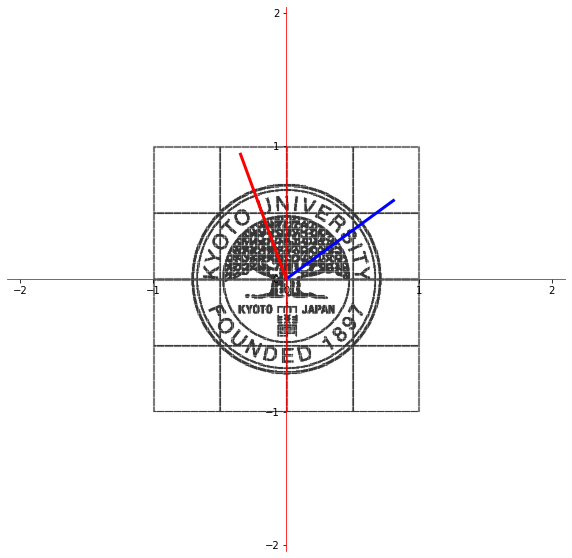

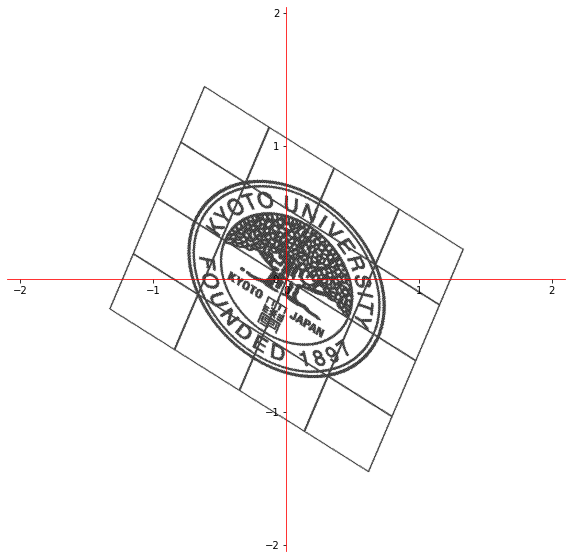

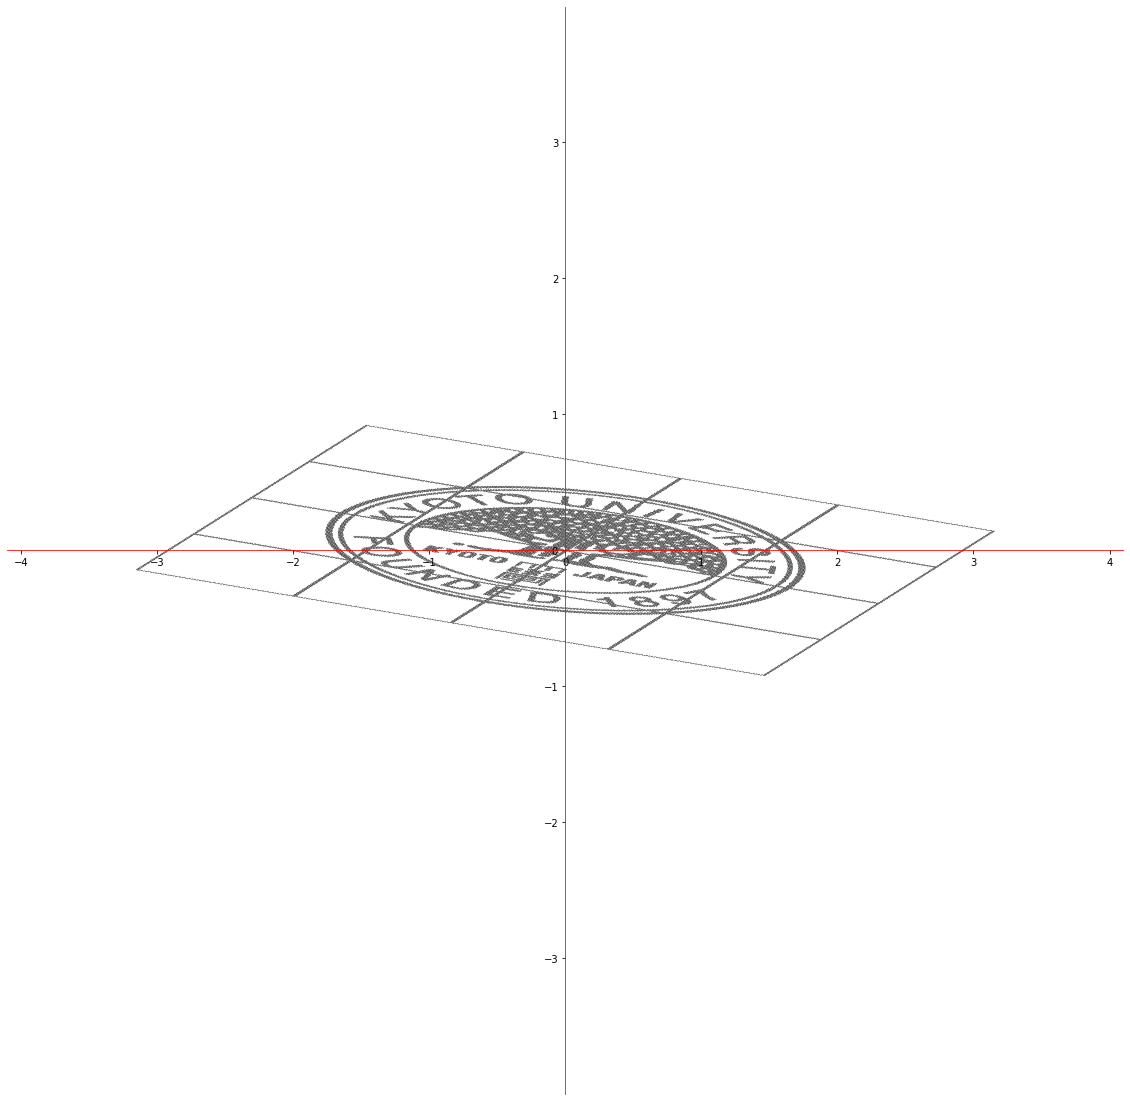

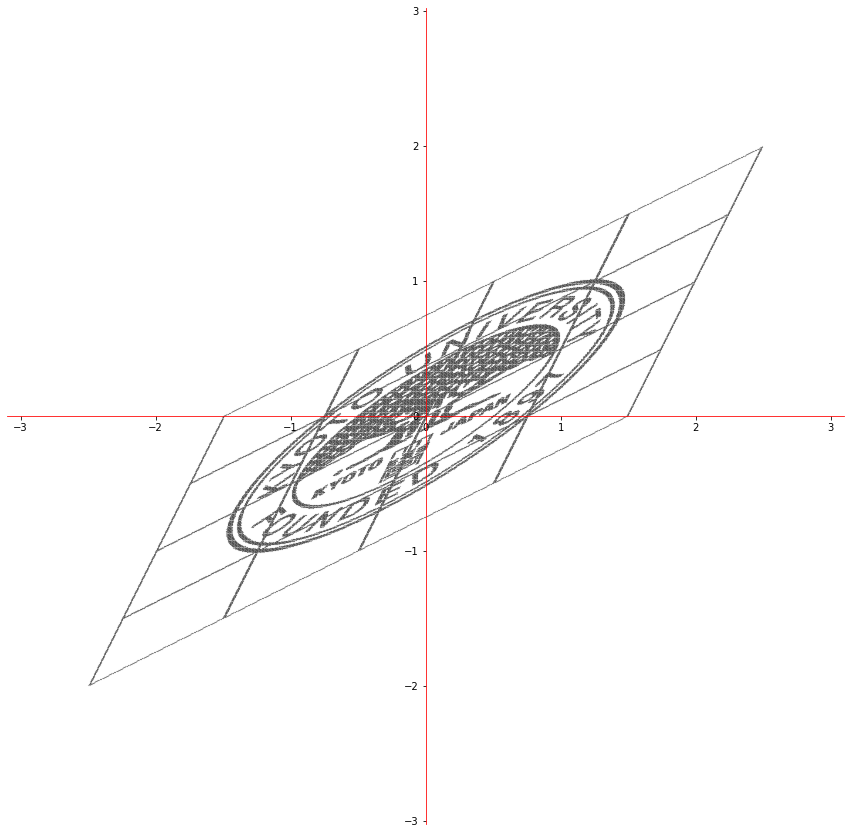

In [21]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
a = np.array([[2,0.5],[1, 1]])
e, v = np.linalg.eig(a)
C = np.array([[e[0], 0], [0, e[1]]] )
vi = np.linalg.inv(v)
fig1 = vi@image
fig2 = C@fig1
fig3 = v@fig2
showimage(image)
plt.plot([0,v[0][0]],[0,v[1][0]], 'b-', lw=3)    
plt.plot([0,v[0][1]],[0,v[1][1]], 'r-', lw=3)  
showimage(fig1)
showimage(fig2)
showimage(fig3)

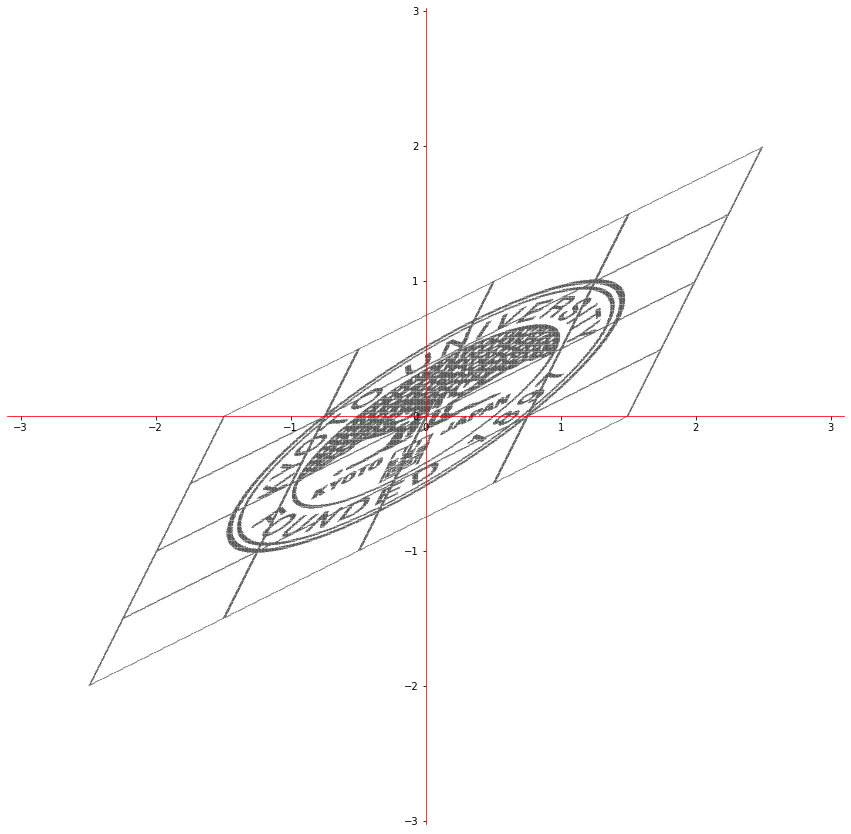

In [22]:
a = np.array([
    [2,0.5],
    [1,1]])
newfig = a@image
showimage(newfig)

## 共分散行列と主成分分析(PCR)


前回，確率変数について学びました。その中で，確率変数 $X$ の平均 $\mu$ に対して，
また，$(x-\mu)^2$ の平均（期待値）のことを分散といって，平均からのばらけ具合を表していると話をしました。
ここでは，$X$ は，何らかのデータが，長さ ＄n$ のリスト $X = [x_0, \ldots, x_{n-1}]$ として与えられているとします。$n$ 人の生徒の数学の成績だとしましょう。
$X$ の平均，$\mu_X = E[X] = \frac{\Sigma x_i}{n}$ に対し，$\sigma_X^2 =E[(X - \mu_X)^2]$ のことを，$X$ の分散といいます。
今，リスト $Y$ として，国語の成績が与えられたとしましょう。
$X$ と $Y$ は一般に独立していません。
どれくらい相関があるかは，通常，共分散 $COV[X,Y] = E[(X-\mu_X)(Y - \mu_Y)]$ で測ります。
$X$ と $Y$ が独立していれば，この値は 0 になります。また，正の相関があれば正の値，負の相関があれば負の値になります。

共分散を両方の標準偏差 $\sigma_X, \SIgma_Y$ で割った値を相関係数といい，1 (正の比例関係)から，-1 (負の比例関係) までの値で，相関の強さが表されます。

今，次の行列（共分散行列）を考えます。
A = \begin{pmatrix}
COV(X,X) & COV(X,Y)\\
COV(Y,X) & COV(Y,Y)
\end{pmatrix}
ここで，$COV(X,X)$ は，$X$ の分散のことです。
$COV(X,Y) = COV(Y,X)$ なので，この行列は対称行列 ($X = {}^tX$)です。
$n$ 次対称行列については，固有値を n 個もち，固有ベクトルはお互いに直交することが知られています。

A の2 つの固有値 $\lambda_1 > \lambda_2$ とし，その固有ベクトルを $p_1 = (x_1, y_1), p_2 = (x_2, y_2)$ とします。$P = (p_1, p_2)$ は，お互いに直交したベクトルを並べたもの，すなわち，直交行列になっています。
直交行列は，２次元の時には回転行列，高次元の場合でも，正規直交基底を正規直交基底に変換するような高次元の"回転" を
意味します。また，その転置をとるだけで逆行列になります。ですので，固有値を並べた対角行列 $C$ に対し，
$$A = P C {}^tP$$ と対角化できます。
直交行列による対角化は，回転行列になるので，直感的に分かりやすいです。

この共分散行列は，２つのデータの関連性を表す重要なものです。本当は，実データで行うべきものですが，ここでは，
$X$ として標準正規分布をとり，$Y$ として $X$ と他の標準正規分布との和に対して，これらを求めてみましょう。



X の分散 1.0443879720448228
Y の分散 2.297780311026079
X と Y の共分散 1.1684590427111297
ライブラリを用いると [[1.051 1.174]
 [1.174 2.313]]
この微妙な差は何？
固有値 [0.349 3.015]
固有ベクトル [[-0.858 -0.513]
 [ 0.513 -0.858]]


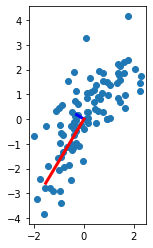

固有ベクトルが座標軸に来るように回転。
回転後の共分散行列は [[0.349 0.   ]
 [0.    3.015]]


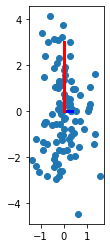

In [188]:
N = 100
X = np.random.randn(N)
Y = X + np.random.randn(N)
print("X の分散", sum(X*X)/N)
print("Y の分散", sum(Y*Y)/N)
print("X と Y の共分散", sum(X*Y)/N)
A = np.cov(X,Y)
print("ライブラリを用いると", A)
print("この微妙な差は何？")
e, v = np.linalg.eig(A)
print("固有値", e)
print("固有ベクトル",v)
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.scatter(X,Y )  # 0,01 は点のサイズ。
    
plt.plot([0,e[0]*v[0][0]],[0,e[0]*v[1][0]], 'b-', lw=3)    
plt.plot([0,e[1]*v[0][1]],[0,e[1]*v[1][1]], 'r-', lw=3)  
plt.show()

print("固有ベクトルが座標軸に来るように回転。")
fig, ax = plt.subplots()
vi = np.linalg.inv(v)
B = vi@[X,Y]
plt.scatter(*B)
D = np.cov(*B)
print("回転後の共分散行列は", D)
plt.plot([0,e[0]],[0,0], 'b-', lw=3)    
plt.plot([0,0],[e[1],0], 'r-', lw=3)  
ax.set_aspect('equal')
plt.show()

このようにして，回転後のデータの共分散行列は，固有値を成分とした対角行列になることが知られています。つまり，固有値を分散とした独立な事象の積とみなすことができます。関連性がないので，ある意味，無駄なくデータを表現しているといえます。（第1固有ベクトル方向は，射影結果が最も分散が大きくなる直線のように思いますが，これは調べていません。）より高い次元でも，固有ベクトルはお互いに直交しているので，その方向に座標軸をおいて点集合を見直してやります。そして，分散の小さな座標軸は無視（値が小さいので０とみなす）と，元の点集合とほとんど同じ形で，次元数を削減した点集合ができあがります。それに，逆行列（これは，固有ベクトルの行列を転置するだけで得られるのでした）をかけてやると，元の点集合を近似したものにもどります。

このようにして，分散の低い方向を無視することにより情報を圧縮する（重要な情報だけを取り出す）ことを，主成分分析(PCR) といいます。



# 最終課題への問題集

## リストの2つの部分へのきれいな分割

[1,2,3,4] というリストは，[1,4] と [2,3] という2つの部分に分けて，それぞれの和を等しくできる。[1,2,3,4,5,6,7,8] というリストを2つの部分に分けて，それぞれの和だけでなく，2乗の和も等しくできるだろうか。

[1,2,3,...,2^(n+1)] を2つの部分に分けて，和，2乗和，..., n 乗和を等しくする方法があるのだが，n = 1,2,3 くらいまではしらみつぶしで調べられても，そこから先は計算機の能力を超える。3 までで法則性を想像して，それが本当に成り立つかどうか，もっと大きな n まで調べよう。コンピュータでどこまで確かめられるだろうか。

解説：この分割法は，Thue-Morse 列と呼ばれているものである。
Thue-Morse 列がこの性質を満たすことの証明を自分で行うか，net の上で探そう。
Thue-Morse 列の性質はいろんな性質をもっている。n が小さい時に確認したり，自分で証明したりしよう。

## タイリング

$2 \times 2$ の正方形から1つ小さな正方形を除いた，大きさ3のブロックを考える。
このブロックを$2^n \times 2^n$ の正方形にひき詰めようとしても，無理である。（なぜか？）

$2^n \times 2^n$ の正方形から 1 つ任意の単位正方形を除いた，$2^n \times 2^n - 1$  の
大きさの領域なら，数だけをみたら，敷き詰められる可能性がある。（なぜか？）

実際に，任意の n >1 において，また，任意の1つの単位正方形の選び方において，敷き詰めが可能である。
そのことは，次のようにして数学的帰納法で証明できる。まず，n = 2 では可能である。
n で可能な時，$2^{n+1} \times 2^{n+1}$ の正方形から1つの単位正方形を除いた図形が
与えられたとする。これを，4 つの$2^n \times 2^n$ の正方形成分の集まりと見た時，その一つだけに，
一つの単位正方形がぬけている。このぬけている成分のところに欠けた部分がくるように，ど真ん中に一つブロックを
を配置する。すると，4つの$2^n \times 2^n$成分は，それぞれが1つづつぬけた状態になる。よって，
帰納法の仮定により，これらはブロックで敷き詰められる。このようにして，全体がブロックで敷き詰められる。

さて，この証明に従った形で，ブロックの敷き詰めを行おう。敷き詰めには，int の ndarray を用いて，
抜けた部分は -1 で，各ブロックは同じ数を用いて表そう。例えば，次は一つの敷き詰めである。0 は，まだ置かれていないことを表すのにとっておこう。


**練習問題** 上の問題で，1つは敷き詰めがあることが分かったが，それぞれの n と単位ブロックの位置に対して，何種類の敷き詰めがあるだろうか。再帰的な手続きは，このようなしらみつぶし的な探索に有効である。数え上げの方法を考えよう。

## ロジスティック・マップのカオス

$0 \leq a \leq 4 $ の a を固定して，
関数 $f_a(x) = a x (1-x)$ を考える。
この関数を繰り返し適用した時の点の挙動について，最初の方の演習で調べ，a の値によって，全く異なる挙動をすることが分かった。ある a については，無限に繰り返すと 1 点に収束していくし，ある a では，２ つの値を繰り返しとる，他の a では，とてもランダムな挙動をした。極限での挙動は，x = 0.5 から始めて，$f_a$ を繰り返し適用し，
最初しばらくの値は捨てて，そこからしばらくの値をぷろっとしてやれば，近似的に図示できそうだ。 a を横軸にして，それぞれの a での挙動を縦軸にとって，図示してみよう。

その一部をズームできる機能もつけてみよう。

## 複素関数と図形

解析関数をかけることにより図形が変形したが，解析関数がパラメータで表現されており，そのパラメータを変化させるとどのように図形が変形していくか，見てみたい。それを通して，解析関数の性質が深く理解できるのではないか。

## 複素力学系のマンデルブロー集合とジュリア集合

複素関数による力学系を考えよう。

$f_c(x) = x^2 + c$ という写像を考えよう。
これを，x = 0 に対して繰り返し適用した時に，点列が無限遠に発散しないで，有限の値をとるような複素数 c の集まりをマンデルブロー集合という。マンデルブロー集合を描画してみよう。

また，各 c に対し，$f_c$を繰り返し適用しても無限遠に発散しないような点のあつまりを，充填ジュリア集合という。
各複素数 c に対し，充填ジュリア集合を描画してみよう。
マンデルブロー集合の中の各点 c をマウスでクリックして
指定したら，その c に対する充填ジュリア集合を描画するようにしてみよう。

マウスのクリックをとるには，グラフィカルなユーザインターフェース(GUI) を作るライブラリ（例えば，tkinter）が必要である。


## 公開鍵暗号系

公開鍵暗号の標準的な方法である，RSA 暗号は，フェルマーの小定理という数論の定理を用いて作られている。RSA 暗号について勉強し，暗号化，復号化のプログラムを組んでみよう。

## 主成分分析，データ科学

主成分分析やその他のデータ科学的な分析を，人工的に作成したデータではなく，さまざまな実データに対して行ってみよう。

## 機械学習

教師データさえそろえば，ニューラルネットを組んで，機械学習が可能である。ネットなどで利用可能なデータを探して，それを用いた機械学習を試みてみよう。データは，利用方法の制限があることがあるので，利用規約を確認すること。データをニューラルネット向きに整形することや，ニューラルネットには多くのハイパーパラメーターがあるので，それをうまく調整することが必要である。それには，ニューラルネット自体に対する理解も必要になってこよう。


気象データー： https://www.data.jma.go.jp/obd/stats/etrn/

基盤地理情報： https://fgd.gsi.go.jp/download/menu.php

##  様々なライブラリの利用

データ処理に用いる pandas

数値計算ではなく，数式的な計算を行う sympy

機械学習に用いる scikitlearn, tensorflow/keras, chainer

など，python には，多くの興味深いライブラリが揃っている。こういったライブラリを利用した課題を自分で定めよう。






## Co-prime island の探検

平面上で，互いに素な自然数を座標にもつ点の集合 $C = \{(a, b)∊N×N \mid gcd(a, b) = 1\}$ 
を考える。 $(x, y)$ が与えられた時，その近辺 (例えば，$x,y$ が $\pm 10$ の範囲) の $C$ の形を
図示するプログラムを作成しよう。
それを用いて，(10,10), (14969284481128733643, 4316323553012369975) の近辺を図示しよう。また，
(15526977269296313567691264811800853340726353275029706052833548819921639, 46108362364134041950530386732628607870761623133167765763870301250940135)
の近辺を図示しよう。

C 上で，縦横斜めで接しているという連結関係で，C を連結成分に分けた時，(1, 1) の連結成分に属していない部分を Co-prime island と呼びます。京都産業大学の山田修司先生（京大の非常勤もされていました）が，数学セミナーという雑誌の 2020 年 10月号（図書館に見つかるはず）に記事を書かれていて，その最後の定理が，どのような形が Co-prime 島になりうるかを示しており，また，その証明が，その形の Co-prime island を探す方法を含んでいます。これをもとにプログラムを作成し，好みの Co-prime island を見つけよう。